# Project: Tackling the Health Crisis in Africa 


## Table of Contents  

<ul>
<li><a href="#intro">Introduction</a></li> 
<li><a 
href="#wranglingpy">Data Wrangling with Python</a>
    <ul> 
        <li><a href="#assesspy">Data Assessment</a></li> 
        <li><a href="#issues">Data Issues</a></li>
        <li><a href="#cleaningpy">Data Cleaning</a></li>
        </ul>
    </li> 
<li><a 
href="#database">Creating Database</a></li>
<li><a 
href="#wranglingsql">Data Wrangling with SQL</a>
    <ul> 
        <li><a href="#assesssql">Data Assessment</a></li>
        <li><a href="#cleaningsql">Data Cleaning</a></li> 
        </ul> 
    </li> 
<li><a 
href="#eda">Exploratory Data Analysis with SQL</a></li>
<li><a 
href="#visual">Data Visualization</a></li>
<li><a href="#conclusion">Conclusion</a></li> 
<li><a 
href="#limitations">Limitations</a></li> 
<li><a 
href="#refs">References</a></li>     
</ul> 

<a id='intro'></a>
## Introduction

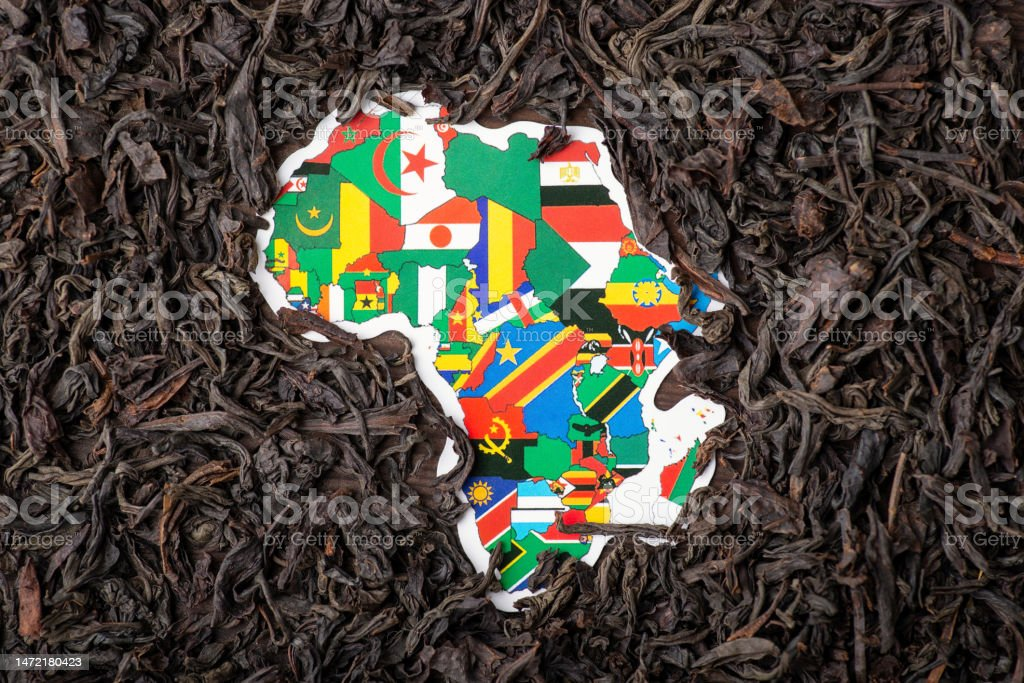

*© Unsplash* 


Africa is the second largest continent in the world in terms of both area and population, with 54 independent countries. 18% of the world's population, as reported by [Wikipedia](https://en.m.wikipedia.org/wiki/Africa), resides in Africa.  It is a continent rich in natural resources including but not limited to natural gas, oil, water, minerals, and arable land. 

According to the [United Nations Environment Programme (UNEP)](https://www.unep.org/regions/africa/our-work-africa#:~:text=The%20continent%20has%2040%20percent,internal%20renewable%20fresh%20water%20source.), Africa is home to some 30% of the world’s mineral reserves, 8% of the world’s natural gas and 12% of the world’s oil reserves.  It includes that Africa has 40% of the world’s gold and up to 90% of its chromium and platinum, along with the largest reserves of cobalt, diamonds, platinum and uranium in the world. Furthermore, it states that Africa holds 65% of the world’s arable land and 10% of the planet’s internal renewable fresh water source. 

However, in spite of these resources, Africa's health situation is dire. [Statista](https://www.statista.com/statistics/1282721/number-of-deaths-in-africa/) reports that over 10 million people died in Africa as a whole in 2019, and predicts that number will rise by over 2 million by 2027.

The statistics are alarming, and as stated by [WHO](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1661756/) Africa will never climb out of poverty unless its devastating health challenges are tackled, for health is wealth. Hence, this analysis aims to gain insights into the health crisis in Africa and offer suggestions on how to reduce its death toll. 
 

Six datasets will be used in this analysis:

- `expenditures` :  Provides data from 2000 to 2021 on the percentage of GDP spent on health in each country across the world. 


- `causes` : Provides data on the number of deaths from 1990 to 2019 due to 32 distinct causes (such as cardiovascular diseases, neonatal disorders, malaria, and HIV/AIDS) in each country across the world. 


- `age_groups` : Provides data on the number of deaths worldwide by age group (<5 years, 5-14 years, 15-49 years, 50-69 years, and 70+) from 1990 to 2019. 


- `med_doctors_per_10000` : Includes data on the number of medical doctors per 10,000 persons in the various countries across the world. 


- `codes` : Consists of codes for each of the seven continents as well as two- and three-letter codes for the countries that make up each continent. 


- `world_population` : Contains data on the population sizes (historical estimates) of the various countries worldwide from well before 1990 to 2021.


The datasets can be found [here](https://d2ag3jdu89hmr4.cloudfront.net/link_click/Clv2b0DOAo_xkEd5/af3b1c9887c1dae38acd4dfb3d1b19ba). 

In [1]:
#import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
import sqlite3 
sb.set_style("darkgrid")

%matplotlib inline 

In [2]:
#install the ipython-sql library 
!pip install ipython-sql 


In [3]:
#load data into dataframes 
df_expenditures = pd.read_excel("Current health expenditure (% of GDP).xlsx", 
                               header = 4, engine = "openpyxl")
df_causes = pd.read_csv("annual-number-of-deaths-by-cause.csv") 
df_age_groups = pd.read_csv("number-of-deaths-by-age-group.csv") 
df_doctors = pd.read_excel("Medical Doctors Per 10000 population.xlsx", 
                          header = 2, engine = "openpyxl") 
df_codes = pd.read_csv("ISO3166_country-and-continent-codes-list-csv.csv") 
df_world_pop = pd.read_csv("World_Population.csv")


<a id='wranglingpy'></a>
## Data Wrangling with Python 

In order to facilitate easy analysis, each table will be evaluated and properly formatted using Python.

<a id='assesspy'></a>
### Data Assessment 

In [4]:
#view random records from df_expenditures
df_expenditures.sample(5) 


,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
207,Senegal,SEN,Current health expenditure (% of GDP),3.539711,3.679165,3.951299,4.296454,4.568480,3.674662,3.763377,...,4.266880,4.385752,4.396058,4.382573,4.260781,3.997075,4.238257,4.132269,NaN,NaN
258,Vanuatu,VUT,Current health expenditure (% of GDP),3.312522,3.393388,3.904378,3.506919,3.539915,3.305286,3.321756,...,3.935628,4.392345,3.646688,4.321683,2.931301,2.762915,3.346379,3.360347,NaN,NaN
82,Georgia,GEO,Current health expenditure (% of GDP),7.194592,7.169509,7.814743,8.029529,8.089108,8.077341,7.632081,...,8.047159,7.883048,7.903869,7.423015,7.996707,7.058044,7.113297,6.657443,NaN,NaN
75,Finland,FIN,Current health expenditure (% of GDP),7.092532,7.250904,7.627695,7.938051,8.059129,8.287956,8.284118,...,9.585795,9.805346,9.781151,9.645239,9.377960,9.126701,9.036085,9.153483,NaN,NaN
37,Switzerland,CHE,Current health expenditure (% of GDP),9.114019,9.439194,9.852151,10.109376,10.184956,10.004179,9.533417,...,10.248756,10.462145,10.616423,11.007950,11.300055,11.480999,11.379971,11.291481,NaN,NaN


In [5]:
#view random rows in df_causes table
df_causes.sample(5)

,Entity,Code,Year,Number of executions (Amnesty International),Meningitis,Alzheimer's disease and other dementias,Parkinson's disease,Nutritional deficiencies,Malaria,Drowning,...,Chronic kidney disease,Poisonings,Protein,Terrorism (deaths),Road injuries,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,"Fire, heat, and hot substances",Acute hepatitis
385,Austria,AUT,2018,NaN,31.0,4709.0,1017.0,12.0,0.0,55.0,...,3357.0,31.0,2.0,NaN,485.0,3356.0,1795.0,3188.0,42.0,3.0
726,Bolivia,BOL,1999,NaN,355.0,593.0,233.0,1532.0,16.0,686.0,...,1903.0,109.0,1448.0,NaN,1985.0,2118.0,1964.0,3919.0,231.0,39.0
3936,Middle East & North Africa (WB),NaN,2004,NaN,6691.0,26926.0,7138.0,5120.0,4205.0,8101.0,...,53116.0,3362.0,4679.0,NaN,118526.0,61495.0,70999.0,89840.0,9782.0,4604.0
2628,Guinea,GIN,2019,NaN,3260.0,931.0,264.0,1741.0,11336.0,511.0,...,1933.0,275.0,1685.0,NaN,2258.0,2787.0,2382.0,3915.0,390.0,260.0
5881,South-East Asia Region (WHO),NaN,2003,NaN,91941.0,82908.0,33347.0,137719.0,98151.0,119022.0,...,221144.0,10180.0,107246.0,NaN,272249.0,1054051.0,354063.0,609456.0,28989.0,74859.0


In [6]:
#get the distinct years present in df_causes table 
df_causes.Year.unique() 


array([2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015, 2016, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2010, 2017, 2018, 2019])

In [7]:
#view random rows in df_age_groups table
df_age_groups.sample(5)

,Entity,Code,Year,Deaths 70+ years,Deaths 50-69 years,Deaths Age: 15-49 years,Deaths 5-14 years,Deaths Under 5
3971,Nauru,NRU,2001,12,25,33,2,18
831,Brunei,BRN,2011,564,472,317,15,64
3274,Libya,LBY,1994,5638,3804,3158,646,5008
2514,Guyana,GUY,2014,2142,2254,1610,80,409
2190,Georgia,GEO,1990,28000,19707,6324,466,3456


In [8]:
#view random rows in the df_doctors table
df_doctors.sample(10)

,IndicatorCode,Indicator,ParentLocationCode,ParentLocation,ThreeLocCode,Location,Period,FactValueNumeric,Value
4267,HWF_0002,Medical doctors (number),EUR,Europe,CZE,Czechia,2003,35960.00,35 960
2615,HWF_0001,"Medical doctors (per 10,000)",WPR,Western Pacific,JPN,Japan,2000,19.24,19.24
6924,HWF_0003,Generalist medical practitioners (number),EUR,Europe,ISL,Iceland,2011,185.00,185
6885,HWF_0003,Generalist medical practitioners (number),EUR,Europe,HRV,Croatia,1996,3045.00,3045
7620,HWF_0004,Specialist medical practitioners (number),AFR,Africa,TGO,Togo,2018,392.00,392
5225,HWF_0002,Medical doctors (number),EUR,Europe,MNE,Montenegro,2011,1259.00,1259
5639,HWF_0002,Medical doctors (number),EUR,Europe,TUR,Türkiye,2002,91949.00,91 949
5722,HWF_0002,Medical doctors (number),SEAR,South-East Asia,BGD,Bangladesh,2011,57313.00,57 313
6064,HWF_0002,Medical doctors (number),WPR,Western Pacific,LAO,Lao People's Democratic Republic,2005,1614.00,1614
6947,HWF_0003,Generalist medical practitioners (number),EUR,Europe,ISR,Israel,2008,8612.00,8612


In [9]:
#view random rows from df_codes 
df_codes.sample(5) 


,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
235,Europe,EU,United Kingdom of Great Britain & Northern Ire...,GB,GBR,826.0
49,Africa,AF,Mayotte,YT,MYT,175.0
22,Africa,AF,"Botswana, Republic of",BW,BWA,72.0
162,Oceania,OC,Niue,NU,NIU,570.0
101,Europe,EU,"Iceland, Republic of",IS,ISL,352.0


In [10]:
#view random rows from df_world_pop 
df_world_pop.sample(5)

,Entity,Code,Year,Population (historical estimates)
19553,Grenada,GRD,1870,37739
38587,Palau,PLW,1911,6069
40059,Philippines,PHL,1866,4593053
30102,Malaysia,MYS,1806,287000
27363,Lebanon,LBN,1988,3457153


In [11]:
#check for unique indicator names in expenditure
df_expenditures["Indicator Name"].unique()


array(['Current health expenditure (% of GDP)'], dtype=object)

In [12]:
#obtain the unique indicator codes in the expenditures table
df_doctors.IndicatorCode.unique() 


array(['HWF_0001', 'HWF_0002', 'HWF_0003', 'HWF_0004', 'HWF_0005'],
      dtype=object)

In [13]:
#check for unique indicators in df_doctors 
df_doctors.Indicator.unique()


array(['Medical doctors (per 10,000)', 'Medical doctors (number)',
       'Generalist medical practitioners (number)',
       'Specialist medical practitioners (number)',
       'Medical doctors not further defined (number)'], dtype=object)

In [14]:
#obtain the distinct years for which the world population was recorded  
df_world_pop.Year.unique()


array([-10000,  -9000,  -8000,  -7000,  -6000,  -5000,  -4000,  -3000,
        -2000,  -1000,      0,    100,    200,    300,    400,    500,
          600,    700,    800,    900,   1000,   1100,   1200,   1300,
         1400,   1500,   1600,   1700,   1710,   1720,   1730,   1740,
         1750,   1760,   1770,   1780,   1790,   1800,   1801,   1802,
         1803,   1804,   1805,   1806,   1807,   1808,   1809,   1810,
         1811,   1812,   1813,   1814,   1815,   1816,   1817,   1818,
         1819,   1820,   1821,   1822,   1823,   1824,   1825,   1826,
         1827,   1828,   1829,   1830,   1831,   1832,   1833,   1834,
         1835,   1836,   1837,   1838,   1839,   1840,   1841,   1842,
         1843,   1844,   1845,   1846,   1847,   1848,   1849,   1850,
         1851,   1852,   1853,   1854,   1855,   1856,   1857,   1858,
         1859,   1860,   1861,   1862,   1863,   1864,   1865,   1866,
         1867,   1868,   1869,   1870,   1871,   1872,   1873,   1874,
      

<a id='issues'></a>
### Data Issues 

`df_expenditures` 
- Redundant indicator name column 
- The years as columns 
- Space between column names 
- Uppercase column names

`df_causes` 
- Unwanted column: _Number of executions (Amnesty International)_ 
- Causes of death as column name 
- Uppercase column names 
- _entity_ as column name
- Number of deaths as float

`df_age_groups` 
- Age groups column names 
- _entity_ as column name
- Age groups as columns 
- Uppercase column names

`df_doctors` 
- Medical practitioners rows beside **Medical doctors (per 10,000)**
- Unwanted columns: _IndicatorCode_, _Indicator_, and _Value_ columns 
- Uppercase column names
- _ParentLocationCode_, _ParentLocation_, _ThreeLocCode_, and _FactValueNumeric_ column names

`df_codes` 
- _Country_Number_ as float    
- Uppercase column names

`df_world_pop` 
- _Entity_ and _Population (historical estimates)_ column names 
- Uppercase column names  


<a id='cleaningpy'></a>
### Data Cleaning 

`df_expenditures` 

Here the _Indicator Name_ column will be removed as it is the same for all rows, therefore, it is redundant. 

In [15]:
#drop column containing records of indicator names
df_expenditures.drop("Indicator Name", axis = 1, inplace = True) 

#confirm
df_expenditures.head(1)


,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Hadley Wickham in his 2014 paper published in the Journal of Statistical Software, [Tidy Data](https://www.jstatsoft.org/article/view/v059i10), defines a tidy dataset as one in which:

- Each variable forms a column.
- Each observation forms a row.
- Each type of observational unit forms a table.

The `df_expenditures` table shows the different years as columns, so next, those columns will be transformed into rows to form a year column. 

In [16]:
#put all the distinct years in a column "year" and their number of death values 
# in each row in a separate column "num_death"
expenditures_new = pd.melt(df_expenditures, id_vars = ["Country Name", "Country Code"], 
        var_name = "year", value_name = "health_expenditure_pct_gdp")                           
          
#confirm 
expenditures_new.head(1)
                                   

,Country Name,Country Code,year,health_expenditure_pct_gdp
0,Aruba,ABW,2000,NaN


In [17]:
#confirm distinct years in year columm 
expenditures_new.year.unique()


array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype=object)

For more flexibility, it is better to replace the space between column names with an underscore \(_).

Columns like _Country Names_ and _Country Code_ will be changed to _Country_Name_ and _Country_Code_ respectively. Also, all the letters in the column names of `expenditures_new` will be changed to lower case. 

In [18]:
def replace_space_lower_case(df, col_list): 
    """The function returns a table with lower case column names, and 
    spaces replaced with underscores in column names initially having 
    spaces between them"""
    for name in col_list: 
        if " " in name: 
            df = df.rename(columns = {name:name.replace(" ", "_").lower()
                                        }) 
        else: 
            df = df.rename(columns = {name:name.lower()}) 
    return df
                                        
                                         


In [19]:
exp_col_names = expenditures_new.columns 

exp_col_names

Index(['Country Name', 'Country Code', 'year', 'health_expenditure_pct_gdp'], dtype='object')

In [20]:
#apply the function on expenditure_new 
expenditures_new = replace_space_lower_case(expenditures_new, exp_col_names) 

#confirm
expenditures_new.head(1)
                                   

,country_name,country_code,year,health_expenditure_pct_gdp
0,Aruba,ABW,2000,NaN


`df_causes` 

The causes of death are in separate columns in the `df_causes` table, and as stated earlier, would need to be put into a single column to meet the tidy data standard. 

First though, the _Number of executions (Amnesty International)_ column will be removed as it is not significant to this analysis. 

In [21]:
#rename the Number of executions (Amnesty International) column  
df_causes.drop("Number of executions (Amnesty International)", 
                 axis = 1, inplace = True) 

#confirm
df_causes.head(1)


,Entity,Code,Year,Meningitis,Alzheimer's disease and other dementias,Parkinson's disease,Nutritional deficiencies,Malaria,Drowning,Interpersonal violence,...,Chronic kidney disease,Poisonings,Protein,Terrorism (deaths),Road injuries,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,"Fire, heat, and hot substances",Acute hepatitis
0,Afghanistan,AFG,2007,2933.0,1402.0,450.0,2488.0,393.0,2127.0,3657.0,...,4490.0,512.0,2439.0,1199.0,7425.0,7222.0,3346.0,6458.0,481.0,3437.0


In [22]:
#put the causes of death in a single column "cause" 
# and the number of death recorded for each causes in "num_death"
causes_new = pd.melt(df_causes, id_vars = ["Entity", "Code", "Year"], 
                     var_name = "cause", value_name = "num_death")

#confirm
causes_new.head(1)
    

,Entity,Code,Year,cause,num_death
0,Afghanistan,AFG,2007,Meningitis,2933.0


The _Entity_ column name does not adequately describe the variable, hence it will be replaced with a more descriptive name.

In [23]:
#replace Entity with a more descriptive name 
causes_new.rename(columns = {"Entity" : "country"}, 
                 inplace = True)

#confirm 
causes_new.columns


Index(['country', 'Code', 'Year', 'cause', 'num_death'], dtype='object')

 Lastly, the replace_space_lower_case() function created earlier will be used to change all the column names letters to lower case, and the _num_death_ column will be changed to an integer variable as body counts can only be done using whole numbers. 
  

In [24]:
#put column names in a list 
causes_col_names = causes_new.columns 

#apply the replace_space_lower_case function 
causes_new = replace_space_lower_case(causes_new, 
                                      causes_col_names)
#confirm 
causes_new.head(1) 


,country,code,year,cause,num_death
0,Afghanistan,AFG,2007,Meningitis,2933.0


In [25]:
#check current data type of the columns 
causes_new.dtypes


country       object
code          object
year           int64
cause         object
num_death    float64
dtype: object

In [26]:
#change data type of num_death from float to integer 
causes_new.num_death = causes_new.num_death.astype("Int64")

#confirm 
causes_new.dtypes


country      object
code         object
year          int64
cause        object
num_death     Int64
dtype: object

`df_age_groups`  

The age group column names have "Deaths" or "Deaths Age:" or "Deaths Under" attached to them. They will be removed along with "years" (as it is redundant) to leave just the age groups.

Also, as with `df_causes` above, the _Entity_ column name does not adequately describe the variable, hence it will be replaced with a more descriptive name. 

In [27]:
df_age_groups.rename(columns = {"Deaths 70+ years" : "70+", 
                                "Deaths 50-69 years" : "50-69", 
                                "Deaths Age: 15-49 years" : "15-49", 
                                "Deaths 5-14 years" : "5-14", 
                                "Deaths Under 5" : "<5", 
                                "Entity" : "country"}, 
                     inplace = True)
                     
#confirm 
df_age_groups.head(1)
                     

,country,Code,Year,70+,50-69,15-49,5-14,<5
0,Afghanistan,AFG,1990,34681,40624,22968,5642,78170


Next, following the [Hadley Wickham: Tidy Data](https://www.jstatsoft.org/article/view/v059i10) standard, the different age groups will be put into a single column, _age_group_, and their values into another column, _num_death_. 

In [28]:
#put the age groups into a single columm and their values 
#into another 
age_groups_new = pd.melt(df_age_groups, id_vars = ["country", "Code", "Year"], 
                         var_name = "age_group", value_name = "num_death")

#confirm
age_groups_new.head(1)


,country,Code,Year,age_group,num_death
0,Afghanistan,AFG,1990,70+,34681


In [29]:
#confirm
age_groups_new.age_group.unique() 


array(['70+', '50-69', '15-49', '5-14', '<5'], dtype=object)

The replace_space_lower_case() function will be used to make the column names uniform. 

In [30]:
#get the age_groups_new column names 
age_col_names = age_groups_new.columns

age_groups_new = replace_space_lower_case(age_groups_new, age_col_names)

#confirm 
age_groups_new.head(1)

,country,code,year,age_group,num_death
0,Afghanistan,AFG,1990,70+,34681


In [31]:
#check data type of the columns 
age_groups_new.dtypes 


country      object
code         object
year          int64
age_group    object
num_death     int64
dtype: object

`df_doctors`  


In this analysis, information from the `df_doctors` table is only required for **Medical doctors (per 10,000)**, therefore rows containing information for other medical practitioners will be dropped. 

In [32]:
#confirm that the HWF_0001 code is unique to Medical doctors (per 10,000) 
df_doctors.query('IndicatorCode == "HWF_0001"').Indicator.unique()


array(['Medical doctors (per 10,000)'], dtype=object)

In [33]:
#confirm that only Medical doctors (per 10,000) only use HWF_0001 
#as indicator code 
df_doctors.query('Indicator == "Medical doctors (per 10,000)"').IndicatorCode.unique()


array(['HWF_0001'], dtype=object)

In [34]:
#filter out rows not for Medical doctors (per 10,000)
other_med_pract = df_doctors.query('IndicatorCode != "HWF_0001"') 

#confirm 
other_med_pract.IndicatorCode.unique()


array(['HWF_0002', 'HWF_0003', 'HWF_0004', 'HWF_0005'], dtype=object)

In [35]:
#drop those rows 
doctors_new = df_doctors.drop(other_med_pract.index) 

#confirm 
doctors_new.IndicatorCode.unique()
                                 

array(['HWF_0001'], dtype=object)

Since rows for all other medical practitioners have been dropped off the table leaving only rows for **Medical doctors (per 10,000)**, the _IndicatorCode_ and _Indicator_ columns are now redundant and should be removed. 

The _Value_ column is the same as the _FactValueNumeric_ column, except that _FactValueNumeric_ has a float data type while _Value_ has a string data type, therefore, it will also be dropped. 

Afterwards, all the letters in each column name will be changed to lower case using the replace_space_lower_case() function. 

In [36]:
#drop the unwanted columns 
doctors_new.drop(["IndicatorCode", "Indicator", "Value"], 
                 axis = 1, inplace = True)

#confirm  
doctors_new.head(1)
                               

,ParentLocationCode,ParentLocation,ThreeLocCode,Location,Period,FactValueNumeric
0,AFR,Africa,AGO,Angola,2018,2.14


In [37]:
#put the column names in a list 
doc_col_list = doctors_new.columns

#change columm names to lower case 
doctors_new = replace_space_lower_case(doctors_new, doc_col_list)

#confirm 
doctors_new.head(1)


,parentlocationcode,parentlocation,threeloccode,location,period,factvaluenumeric
0,AFR,Africa,AGO,Angola,2018,2.14


Next, the columns _parentlocationcode_, _parentlocation_, _threeloccode_, and _factvaluenumeric_ will be renamed for better readability and understanding. 

In [38]:
#rename the specified column names
doctors_new.rename(columns = {"parentlocationcode" : "parent_loc_code",
                              "parentlocation" : "parent_loc",
                              "threeloccode" : "three_loc_code",
                              "factvaluenumeric" : "doc_per_10000"},
                   inplace = True)
#confirm 
doctors_new.head(1)

,parent_loc_code,parent_loc,three_loc_code,location,period,doc_per_10000
0,AFR,Africa,AGO,Angola,2018,2.14


In [39]:
#check the data types of the columns  
doctors_new.dtypes


parent_loc_code     object
parent_loc          object
three_loc_code      object
location            object
period               int64
doc_per_10000      float64
dtype: object

`df_codes` 

The country numbers have a float data type and will be converted to int.

Also, the column names will be changed to lower case using replace_space_lower_case().

In [40]:
#change the Country_Number column data type to int
df_codes.Country_Number = df_codes.Country_Number.astype("Int64")

#confirm
df_codes.dtypes


Continent_Name               object
Continent_Code               object
Country_Name                 object
Two_Letter_Country_Code      object
Three_Letter_Country_Code    object
Country_Number                Int64
dtype: object

In [41]:
#put column names in a list 
codes_col_list = df_codes.columns

#change the column names to lower case 
df_codes = replace_space_lower_case(df_codes, codes_col_list) 

#confirm
df_codes.head(1)

,continent_name,continent_code,country_name,two_letter_country_code,three_letter_country_code,country_number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4


`df_world_pop` 

The _Entity_ and _Population (historical estimates)_ column names will be changed for better understanding and flexibility respectively. 

Also, the _Code_ and _Year_ column names will be changed to lower case.  

In [42]:
#renamw the specified columns 
df_world_pop.rename(columns = {"Entity" : "country", 
                               "Code" : "code", 
                               "Year" : "year",
                               "Population (historical estimates)" : "population"}, 
                    inplace = True)
#confirm 
df_world_pop.head(1)
                                  

,country,code,year,population
0,Afghanistan,AFG,-10000,14737


The `df_world_pop` holds records of world population estimates from way before 1990 to 2021. 

The rows with records for the years before 1990 will be dropped since the causes and age groups tables begin from 1990. Hence, those records before 1990 will not be useful for the analysis. 

In [43]:
#filter rows from before 1970 
before_1990 = df_world_pop.query('year < 1990')

#drop the rows 
world_pop_new = df_world_pop.drop(before_1990.index) 

#confirm 
world_pop_new.year.unique()


array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [44]:
#get descriptive summary of the expenditure_new table
expenditures_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5852 entries, 0 to 5851
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country_name                5852 non-null   object 
 1   country_code                5852 non-null   object 
 2   year                        5852 non-null   object 
 3   health_expenditure_pct_gdp  4694 non-null   float64
dtypes: float64(1), object(3)
memory usage: 183.0+ KB


In [45]:
#get descriptive summary of the causes_new table
causes_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232736 entries, 0 to 232735
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   country    232736 non-null  object
 1   code       198592 non-null  object
 2   year       232736 non-null  int64 
 3   cause      232736 non-null  object
 4   num_death  214931 non-null  Int64 
dtypes: Int64(1), int64(1), object(3)
memory usage: 9.1+ MB


In [46]:
#get descriptive summary of the age_groups_new table
age_groups_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34200 entries, 0 to 34199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    34200 non-null  object
 1   code       30750 non-null  object
 2   year       34200 non-null  int64 
 3   age_group  34200 non-null  object
 4   num_death  34200 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.3+ MB


In [47]:
#get descriptive summary of the doctors_new table
doctors_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2844 entries, 0 to 2843
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   parent_loc_code  2844 non-null   object 
 1   parent_loc       2844 non-null   object 
 2   three_loc_code   2844 non-null   object 
 3   location         2844 non-null   object 
 4   period           2844 non-null   int64  
 5   doc_per_10000    2844 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 155.5+ KB


In [48]:
#get descriptive summary of the df_code table
df_codes.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   continent_name             254 non-null    object
 1   continent_code             212 non-null    object
 2   country_name               254 non-null    object
 3   two_letter_country_code    253 non-null    object
 4   three_letter_country_code  254 non-null    object
 5   country_number             250 non-null    Int64 
dtypes: Int64(1), object(5)
memory usage: 12.3+ KB


In [49]:
#get descriptive summary of the world_pop_new table
world_pop_new.info() 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7974 entries, 227 to 56912
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     7974 non-null   object
 1   code        7622 non-null   object
 2   year        7974 non-null   int64 
 3   population  7974 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 311.5+ KB


<a id='database'></a>
## Creating Database 

In [50]:
#create and connect database 
cnn = sqlite3.connect("Health_Crisis.db") 


In [51]:
#create tables in the Health_Crisis database 
expenditures_new.to_sql("expenditures", cnn)
causes_new.to_sql("causes", cnn)
age_groups_new.to_sql("age_groups", cnn) 
doctors_new.to_sql("med_doc_per_10000", cnn)
df_codes.to_sql("codes", cnn) 
world_pop_new.to_sql("world_population", cnn)

                        

In [52]:
#load the sql module to ipython 
%load_ext sql


In [53]:
#connect to the sql database
%sql sqlite:///Health_Crisis.db


<a id='wranglingsql'></a>
## Data Wrangling with SQL 
 
The analysis will be focused on the health issues in Africa. In order to guarantee accurate findings, this section will assess and clean up the data for Africa using SQL. 

<a id='assesssql'></a>
### Data Assessment  

To gain insight into the health situation in Africa, the records of most tables in the database would be filtered to leave only rows containing records for countries in Africa.

The `codes` table has columns for both continents and their countries and their respective codes, and will be used to get the list of countries in Africa and the three-letter code of the countries.  



In [54]:
%%sql 

-- view the distinct continents in codes 

SELECT DISTINCT(continent_name) AS continent 
FROM codes
ORDER BY continent; 


 * sqlite:///Health_Crisis.db
Done.


continent
Africa
Antarctica
Asia
Europe
North America
Oceania
South America


In [55]:
%%sql 

-- obtain the number of countries in Africa 

SELECT COUNT(three_letter_country_code) AS num_countries
FROM codes 
WHERE continent_name = 'Africa';


 * sqlite:///Health_Crisis.db
Done.


num_countries
58


From the count of countries in Africa shown above, there are 58 countries in Africa. But according to [Worldometer](https://www.worldometers.info/geography/how-many-countries-in-africa/#:~:text=There%20are%2054%20countries%20in,the%20United%20Nations%20official%20statistics) there are 54 countries in Africa. 

To determine the problem, the name of the countries will be checked against their three letter code. 

In [56]:
%%sql  

-- obtain the name of the countries in Africa along with 
-- their three letter code

SELECT country_name AS country, 
       three_letter_country_code AS code 
FROM codes 
WHERE continent_name = 'Africa';



 * sqlite:///Health_Crisis.db
Done.


country,code
"Algeria, People's Democratic Republic of",DZA
"Angola, Republic of",AGO
"Botswana, Republic of",BWA
"Burundi, Republic of",BDI
"Cameroon, Republic of",CMR
"Cape Verde, Republic of",CPV
Central African Republic,CAF
"Chad, Republic of",TCD
"Comoros, Union of the",COM
Mayotte,MYT


Further analysis shows the presence of **Mayotte**, **Reunion**, **Saint Helena**, and **Western Sahara** with three-letter country code **REU**, **MYT**, **SHN**, and **ESH** respectively. 

According to [Worldometer](https://www.worldometers.info/geography/how-many-countries-in-africa/#:~:text=There%20are%2054%20countries%20in,the%20United%20Nations%20official%20statistics), they are not countries in Africa but dependent territories. Hence, they will be excluded from the analysis. 


`causes` and `age_groups` tables are important for the analysis and since there are records for countries from other continents besides Africa, the records will need to be filtered. 

The rows in these tables can be filtered using the country codes or the country name columns. 

To decide which is best, both columns will be assessed for each of the tables. 

In [57]:
%%sql 

-- obtain the total number of rows in the causes table, the total number 
-- of rows in the code column and the total for the country column 

SELECT COUNT(*) AS total_count, 
       COUNT(code) AS total_code, 
       COUNT(country) AS total_country
FROM causes;         
      

 * sqlite:///Health_Crisis.db
Done.


total_count,total_code,total_country
232736,198592,232736


In [58]:
%%sql 

-- obtain the total number of rows in the age_groups table, the total number 
-- of rows in the code column and the total for the country column

SELECT COUNT(*) AS total_count, 
       COUNT(code) AS total_code, 
       COUNT(country) AS total_country 
FROM age_groups;


 * sqlite:///Health_Crisis.db
Done.


total_count,total_code,total_country
34200,30750,34200


In both tables, some country code values are missing, but the country name values are complete. 

<a id='cleaningsql'></a>
### Data Cleaning 

A temporary table will be created to obtain the three-letter code of all countries in Africa and their names from the `codes` tables, as they will be needed to filter other tables to obtain records for only countries in Africa. 

In [59]:
%%sql 

-- create a temp table for the list of countries in Africa 
-- using the three-letter country codes 
-- excluding REU, MYT, SHN, and ESH  

-- DROP TABLE IF EXISTS countries_in_africa;

CREATE TEMPORARY TABLE countries_in_africa AS  
    SELECT CASE WHEN country_name LIKE '%,%'
            THEN trim(substr(country_name, 0, instr(country_name, ',')))
            ELSE trim(country_name) 
            END AS country,
            trim(three_letter_country_code) AS country_code 
    FROM codes 
    WHERE continent_name = 'Africa' 
    AND three_letter_country_code NOT IN ('REU', 'MYT', 'SHN', 'ESH');


 * sqlite:///Health_Crisis.db
Done.


[]

In [60]:
%%sql 

-- test 

SELECT COUNT(*)
FROM countries_in_africa;


 * sqlite:///Health_Crisis.db
Done.


COUNT(*)
54


It is important to note that there are missing values for country code in the `causes` and `age_groups` tables as seen above. This could impact the analysis as filtering the rows in those tables using their country code columns, _code_, may cause some rows which contain records for countries in Africa to be neglected if the country code is absent.

Hence, the rows in the `causes` and `age_groups` tables will be filtered using their country name columns, _country_, as they contain no missing values.

The problem with filtering by country name though is that some countries may be represented by their old name in one table, and by their new name in another.  

In [61]:
%%sql  

-- check the name of the countries in the countries_in_africa table

SELECT * 
FROM countries_in_africa 
ORDER BY country;


 * sqlite:///Health_Crisis.db
Done.


country,country_code
Algeria,DZA
Angola,AGO
Benin,BEN
Botswana,BWA
Burkina Faso,BFA
Burundi,BDI
Cameroon,CMR
Cape Verde,CPV
Central African Republic,CAF
Chad,TCD


In [62]:
%%sql 

-- check name of all African countries in the causes table 

SELECT DISTINCT(country)
FROM causes 
WHERE code IN ( 
               SELECT country_code 
               FROM countries_in_africa);


 * sqlite:///Health_Crisis.db
Done.


country
Algeria
Angola
Benin
Botswana
Burkina Faso
Burundi
Cameroon
Cape Verde
Central African Republic
Chad


In [63]:
%%sql  

-- check name of all African countries in the age_group table 

SELECT DISTINCT(country)
FROM age_groups
WHERE code IN ( 
               SELECT country_code 
               FROM countries_in_africa);


 * sqlite:///Health_Crisis.db
Done.


country
Algeria
Angola
Benin
Botswana
Burkina Faso
Burundi
Cameroon
Cape Verde
Central African Republic
Chad


Comparison of the country names in `countries_in_africa`, `causes`, and `age_groups` confirm the use of old names for countries like **Eswatini** (**Swaziland**) and **Libya** (**Libyan Arab Jamahiriya**) in the `countries_in_africa` table.

**Democratic Republic of Congo** was also referred to as **Congo**. 

To be able to filter on the country names in the `causes` and `age_groups`, the specified country names in the `countries_in_africa` table will first be corrected.  

In [64]:
%%sql 

-- update table countries_in_africa 

UPDATE countries_in_africa 
SET country = 'Eswatini' 
WHERE country = 'Swaziland'; 


UPDATE countries_in_africa
SET country = 'Libya'
WHERE country = 'Libyan Arab Jamahiriya'; 


UPDATE countries_in_africa
SET country = 'Democratic Republic of Congo' 
WHERE country_code = 'COD';



 * sqlite:///Health_Crisis.db
Done.
1 rows affected.
1 rows affected.


[]

In [65]:
%%sql 

-- test 

SELECT * 
FROM countries_in_africa
ORDER BY country; 


 * sqlite:///Health_Crisis.db
Done.


country,country_code
Algeria,DZA
Angola,AGO
Benin,BEN
Botswana,BWA
Burkina Faso,BFA
Burundi,BDI
Cameroon,CMR
Cape Verde,CPV
Central African Republic,CAF
Chad,TCD


<a id='eda'></a>
## Exploratory Data Analysis with SQL 

In this section, the tables will be explored to gain insight into the data, and the analysis will be focused on health crisis in Africa.  

### 1. Top 10 causes of death in Africa during the past ten years  

The `causes` table will be explored to obtain the top 10 causes of death in Africa from **2009** to **2019**.

This would be done by filtering on the **country** column in `countries_in_africa`.  

In [66]:
%%sql

-- obtain the top ten causes of death in Africa from 2009 to 2019

WITH causes_by_avg AS ( 
    SELECT cause, 
           CAST(round(AVG(num_death)) AS int) AS avg_death 
    FROM causes 
    WHERE country IN ( 
                      SELECT country 
                      FROM countries_in_africa)
        AND CAST(year AS date) BETWEEN '2009' AND '2019'
    GROUP BY cause
    ORDER BY avg_death DESC)

SELECT cause, 
       DENSE_RANK () OVER (ORDER BY avg_death DESC) AS rank 
FROM causes_by_avg 
ORDER BY rank
LIMIT 10;


 * sqlite:///Health_Crisis.db
Done.


cause,rank
Cardiovascular diseases,1
Neonatal disorders,2
HIV/AIDS,3
Lower respiratory infections,4
Diarrheal diseases,5
Malaria,6
Neoplasms,7
Tuberculosis,8
Digestive diseases,9
Cirrhosis and other chronic liver diseases,10


The analysis shows that most deaths in Africa in the **last 10 years** are caused by **Cardiovascular diseases**, with **Neonatal disorders** coming next. 

**HIV/AIDS** is also high up on the list, as the third most common cause of death in Africa.  

### 2. African countries with the highest death toll over the past ten years 

In [67]:
%%sql 

-- determine the total average number of deaths in Africa from 2009 to 2019
-- then obtain the list of countries in Africa with an 
-- average death higher than the total average within the specified timeframe

WITH most_deaths_countries AS ( 
    SELECT country,
           code,
           CAST(ROUND(AVG(num_death)) AS int) avg_deaths 
    FROM causes 
    WHERE country IN (SELECT country 
                      FROM countries_in_africa)
        AND CAST(year AS date) BETWEEN '2009' AND '2019'
    GROUP BY country, code
    HAVING AVG(num_death) > (SELECT AVG(num_death) AS total_avg_deaths 
                             FROM causes 
                             WHERE country IN (SELECT country 
                                               FROM countries_in_africa)
                                 AND CAST(year AS date) BETWEEN '2009' AND '2019') 
    ) 

SELECT country, 
       code, 
       DENSE_RANK() OVER (ORDER BY avg_deaths DESC) AS rank  
FROM most_deaths_countries 
ORDER BY rank;



 * sqlite:///Health_Crisis.db
Done.


country,code,rank
Nigeria,NGA,1
Democratic Republic of Congo,COD,2
South Africa,ZAF,3
Egypt,EGY,4
Ethiopia,ETH,5
Tanzania,TZA,6
Kenya,KEN,7
Mozambique,MOZ,8
Uganda,UGA,9
Morocco,MAR,10


According to the data, 19 countries in Africa are responsible for the majority of deaths during the past ten years, with **Nigeria**, the **Democratic Republic of the Congo**, **South Africa**, **Egypt**, and **Ethiopia** rounding out the top five in that order.

###  3. The top 5 countries in Africa with the fewest deaths in the last 10 years (2009-2019) 

In [68]:
%%sql 

-- determine the total average number of deaths in Africa from 2009 to 2019
-- then obtain the top 5 countries in Africa with an 
-- average death lower than the total average within the timeframe

WITH least_death_countries AS ( 
    SELECT country,
           code,
           CAST(ROUND(AVG(num_death)) AS int) avg_deaths 
    FROM causes 
    WHERE country IN (SELECT country 
                      FROM countries_in_africa)
        AND CAST(year AS date) BETWEEN '2009' AND '2019'
    GROUP BY country, code
    HAVING AVG(num_death) < ( 
                             SELECT AVG(num_death) AS total_avg_deaths 
                             FROM causes 
                             WHERE country IN (SELECT country 
                                               FROM countries_in_africa)
                                 AND CAST(year AS date) BETWEEN '2009' AND '2019') 
    )

SELECT country, 
       code,
       DENSE_RANK () OVER (ORDER BY avg_deaths) AS rank
FROM least_death_countries
LIMIT 5;


 * sqlite:///Health_Crisis.db
Done.


country,code,rank
Seychelles,SYC,1
Sao Tome and Principe,STP,2
Cape Verde,CPV,3
Comoros,COM,4
Equatorial Guinea,GNQ,5


The countries with the fewest deaths in Africa over the past ten years are, in descending order: **Seychelles**, **Sao Tome and Principe**, **Cape Verde**, **Comoros**, and **Equatorial Guinea**.  

### 4. Age group with the highest death rate during the past ten years 

In [69]:
%%sql 

-- get the total average deaths by age group

WITH avg_death_by_age AS ( 
    SELECT age_group, 
           ROUND(AVG(num_death), 2) AS avg_death
             
    FROM age_groups 
    WHERE country IN (SELECT country 
                      FROM countries_in_africa)
        AND CAST(year AS date) BETWEEN '2009' AND '2019' 
    GROUP BY age_group)

SELECT SUM(avg_death) AS total_avg 
FROM avg_death_by_age


 * sqlite:///Health_Crisis.db
Done.


total_avg
170926.51


In [70]:
%%sql 
-- get age group with the most total deaths from 2009 to 2019
-- along with the percentage deaths recorded for each group on 
-- average 

SELECT age_group, 
       CAST(ROUND(AVG(num_death)) AS int) AS avg_death, 
       ROUND(100 * AVG(num_death)/170926.51, 2) AS pct_avg
             
FROM age_groups 
WHERE country IN (SELECT country 
                  FROM countries_in_africa)
    AND CAST(year AS date) BETWEEN '2009' AND '2019'
GROUP BY age_group
ORDER BY avg_death DESC;


 * sqlite:///Health_Crisis.db
Done.


age_group,avg_death,pct_avg
<5,61156,35.78
15-49,35832,20.96
70+,35138,20.56
50-69,33301,19.48
5-14,5499,3.22


In the past ten years (2009-2019), there have been more deaths reported for children **under the age of 5 years** than for persons in other age categories. Children under the age of five account for about 36% of all recorded deaths, on average. This is followed by people between the ages of **15-49 years**,and then people above **70 years**. 

The lowest mortality rate is among those aged **5-14 years**, followed by those in the **50-69** age range.   

### 5. Death trends during the past ten years 

In [71]:
%%sql 

-- get the total number of deaths recorded each year 
-- from 2009-2019 
-- put in a pivot table

SELECT SUM(num_death) filter (WHERE CAST(year AS date) = 2009) AS "2009",
       SUM(num_death) filter (WHERE CAST(year AS date) = 2010) AS "2010",
       SUM(num_death) filter (WHERE CAST(year AS date) = 2011) AS "2011",
       SUM(num_death) filter (WHERE CAST(year AS date) = 2012) AS "2012", 
       SUM(num_death) filter (WHERE CAST(year AS date) = 2013) AS "2013",
       SUM(num_death) filter (WHERE CAST(year AS date) = 2014) AS "2014",
       SUM(num_death) filter (WHERE CAST(year AS date) = 2015) AS "2015",
       SUM(num_death) filter (WHERE CAST(year AS date) = 2016) AS "2016", 
       SUM(num_death) filter (WHERE CAST(year AS date) = 2017) AS "2017",
       SUM(num_death) filter (WHERE CAST(year AS date) = 2018) AS "2018", 
       SUM(num_death) filter (WHERE CAST(year AS date) = 2019) AS "2019"
FROM causes 
WHERE country IN (SELECT country 
                  FROM countries_in_africa) 
    AND CAST(year AS date) BETWEEN '2009' AND '2019' 
ORDER BY year;


 * sqlite:///Health_Crisis.db
Done.


2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
8993098,8903676,8795696,8687066,8628734,8605519,8582174,8544085,8501480,8430006,8415146


In general, there has been a decrease in the number of deaths in Africa from 2009 to 2019, although only by 577,952—less than a million. 

### 6. Health expenditure, medical doctors per 10,000 people, and population size of the top five African countries with the most deaths during the past ten years, as compared to the top five African countries with the fewest deaths

Next the average health expenditure, medical doctors per 10,000 people, and population size for the top 5 countries in Africa with the highest mortality will be obtained along with that of the top 5 African countries with the lowest death rate over the past 10 years (2009-2019). 


In [72]:
%%sql 

-- obtain the average health expenditure, medical doctors per 10,000, and 
-- population size of the specified countries in the last 10 years 
-- filter both health expenditures and med_doc_per_10000 on their country code 
-- and world_population on the country column

WITH avg_health_expenditure AS ( 
    SELECT country_code,
           ROUND(AVG(health_expenditure_pct_gdp), 2) AS avg_health_expnd_pct
   FROM expenditures 
   WHERE country_code IN ('NGA', 'COD', 'ZAF', 'EGY', 'ETH') 
       AND CAST(year AS date) BETWEEN '2009' AND '2019'
   GROUP BY country_code), 

avg_doc_10000 AS ( 
    SELECT three_loc_code, 
           ROUND(AVG(doc_per_10000), 2) AS avg_doc_per_10000 
    FROM med_doc_per_10000 
    WHERE three_loc_code IN ('NGA', 'COD', 'ZAF', 'EGY', 'ETH') 
       AND CAST(period AS date) BETWEEN '2009' AND '2019'
    GROUP BY three_loc_code), 

avg_pop AS ( 
    SELECT country, 
           ROUND(AVG(population)/1000000, 2) AS avg_pop_in_millions  
    FROM world_population 
    WHERE country IN ('Nigeria', 'Democratic Republic of Congo', 
                      'South Africa', 'Egypt', 'Ethiopia') 
       AND CAST(year AS date) BETWEEN '2009' AND '2019' 
    GROUP BY country) 

SELECT c.country, 
       c.country_code, 
       p.avg_pop_in_millions,
       he.avg_health_expnd_pct, 
       d.avg_doc_per_10000
   
FROM countries_in_africa AS c
LEFT JOIN avg_health_expenditure AS he
ON c.country_code = he.country_code 
LEFT JOIN avg_doc_10000 AS d 
ON c.country_code = d.three_loc_code 
LEFT JOIN avg_pop AS p
ON c.country = p.country
WHERE c.country_code IN ('NGA', 'COD', 'ZAF', 'EGY', 'ETH')
ORDER BY avg_pop_in_millions DESC;

    

 * sqlite:///Health_Crisis.db
Done.


country,country_code,avg_pop_in_millions,avg_health_expnd_pct,avg_doc_per_10000
Nigeria,NGA,179.55,3.4,3.98
Ethiopia,ETH,100.03,4.06,0.51
Egypt,EGY,95.53,4.87,7.91
Democratic Republic of Congo,COD,76.47,3.8,1.86
South Africa,ZAF,54.68,8.76,7.74


According to result from earlier analysis, the top five African countries with the greatest number of deaths over the past ten years (2009–2019) are Nigeria, the Democratic Republic of the Congo, South Africa, Egypt, and Ethiopia, in decreasing order. 


Further analysis above shows **Nigeria** has the highest population, with an average of 179.55 million people (approximately 180 million people) in the last 10 years followed by **Ethiopia**, with a difference of over 79.52 million people. **Egypt** comes next, and then the **Democratic Republic of Congo** and **South Africa**, each with a difference of less than 20 million people from the preceding. 

In [73]:
%%sql 

-- obtain the average health expenditure, medical doctors per 10,000, and 
-- population size of the specified countries in the last 10 years
-- filter both health expenditures and med_doc_per_10000 on their country code 
-- and world_population on the country column

WITH avg_health_expenditure AS ( 
    SELECT country_code,
           ROUND(AVG(health_expenditure_pct_gdp), 2) AS avg_health_expnd_pct
   FROM expenditures 
   WHERE country_code IN ('SYC', 'STP', 'CPV', 'COM', 'GNQ') 
       AND CAST(year AS date) BETWEEN '2009' AND '2019'
   GROUP BY country_code), 

avg_doc_10000 AS ( 
    SELECT three_loc_code, 
           ROUND(AVG(doc_per_10000), 2) AS avg_doc_per_10000 
    FROM med_doc_per_10000 
    WHERE three_loc_code IN ('SYC', 'STP', 'CPV', 'COM', 'GNQ') 
       AND CAST(period AS date) BETWEEN '2009' AND '2019'
    GROUP BY three_loc_code), 

avg_pop AS ( 
    SELECT country,
           ROUND(AVG(population)/1000000, 2) AS avg_pop_in_millions 
    FROM world_population 
    WHERE country IN ('Seychelles', 'Sao Tome and Principe', 
                      'Cape Verde', 'Comoros', 'Equatorial Guinea') 
       AND CAST(year AS date) BETWEEN '2009' AND '2019' 
    GROUP BY country) 

SELECT c.country, 
       c.country_code, 
       p.avg_pop_in_millions,
       he.avg_health_expnd_pct, 
       d.avg_doc_per_10000
 
FROM countries_in_africa AS c
LEFT JOIN avg_health_expenditure AS he
ON c.country_code = he.country_code 
LEFT JOIN avg_doc_10000 AS d 
ON c.country_code = d.three_loc_code 
LEFT JOIN avg_pop AS p
ON c.country = p.country
WHERE c.country_code IN ('SYC', 'STP', 'CPV', 'COM', 'GNQ')
ORDER BY avg_pop_in_millions DESC;
    

 * sqlite:///Health_Crisis.db
Done.


country,country_code,avg_pop_in_millions,avg_health_expnd_pct,avg_doc_per_10000
Equatorial Guinea,GNQ,1.3,2.34,4.02
Comoros,COM,0.72,5.03,2.08
Cape Verde,CPV,0.55,4.87,6.49
Sao Tome and Principe,STP,0.2,6.5,4.02
Seychelles,SYC,0.1,4.88,16.06


Most of the African countries that have experienced the fewest deaths over the past 10 years have average populations that are below 1 million. **Equatorial Guinea**, with a population of 1.3 million on average, is the lone exception. 

In contrast to the countries that produce the least number of deaths in Africa, those that produce the most deaths have a higher population and typically have fewer doctors per 10,000 people. This is seen by a comparison of the tables above.  

The `avg_health_expnd_pct` is the average percentage of the country's GDP that is spent on health in the country. **South Africa** has the highest average value, and **Nigeria** has the lowest even with its large population. However, given that this analysis does not take into account the countries' GDP values for the past ten years (2009–2019), it is not possible to establish how much money each country spends on health.

Also, according to [WHO](https://www.who.int/data/nutrition/nlis/info/health-expenditure), although increasing health expenditure is associated with better health outcomes, especially in low-income countries, there is no 'recommended' level of spending on health. 

The health `expenditures` table and `med_doc_per_10000` tables are filtered on their code columns because the columns contain no missing values, and this reduces errors that may occur due to difference in the spelling of a country's name in different tables.  

The `world_population` is filtered on the country name column as it has missing values for the code column, but none on the country name column.  

### 7. Leading cause of death in Nigeria in 2019 

In [74]:
%%sql 

-- obtain the top 10 causes of death in Nigeria 
-- in 2019 

SELECT cause, 
       SUM(num_death) AS total_death
FROM causes 
WHERE country = 'Nigeria' 
AND CAST(year AS date) = '2019'
GROUP BY cause 
ORDER BY total_death DESC
LIMIT 10;


 * sqlite:///Health_Crisis.db
Done.


cause,total_death
Neonatal disorders,195397
Malaria,191106
Diarrheal diseases,181138
Lower respiratory infections,172978
Cardiovascular diseases,163496
HIV/AIDS,82270
Neoplasms,81558
Digestive diseases,70077
Tuberculosis,45278
Meningitis,44914


In Nigeria, deaths due to neonatal disorders were more common in 2019 than deaths due to other causes. 

### 8. Death trend for cardiovascular diseases and neonatal disorders over the past ten years 

In [75]:
%%sql 

-- create a pivot table showing the trend of the number of deaths 
-- recorded from 2009-2019

SELECT cause,
       SUM(num_death) filter (WHERE year = 2009) AS "2009",
       SUM(num_death) filter (WHERE year = 2010) AS "2010",
       SUM(num_death) filter (WHERE year = 2011) AS "2011",
       SUM(num_death) filter (WHERE year = 2012) AS "2012", 
       SUM(num_death) filter (WHERE year = 2013) AS "2013",
       SUM(num_death) filter (WHERE year = 2014) AS "2014",
       SUM(num_death) filter (WHERE year = 2015) AS "2015",
       SUM(num_death) filter (WHERE year = 2016) AS "2016", 
       SUM(num_death) filter (WHERE year = 2017) AS "2017",
       SUM(num_death) filter (WHERE year = 2018) AS "2018", 
       SUM(num_death) filter (WHERE year = 2019) AS "2019"
FROM causes 
WHERE country IN (SELECT country 
                  FROM countries_in_africa) 
    AND CAST(year AS date) BETWEEN '2009' AND '2019' 
    AND cause IN ('Cardiovascular diseases', 
                  'Neonatal disorders')
GROUP BY cause
ORDER BY cause;


 * sqlite:///Health_Crisis.db
Done.


cause,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Cardiovascular diseases,1295473,1318686,1343136,1377035,1407259,1438445,1485863,1514684,1542059,1573934,1608114
Neonatal disorders,892488,889670,886576,880950,874884,866408,856035,845790,829965,816729,803446


While the number of deaths cause  by **cardiovascular diseases** increased over time, from **2009 to 2019**, by a value of 312,641, the number of deaths caused by **neonatal disorders** declined over time, by a value of 89,042. 

### 9. Rank of countries in Africa by population in the last 10 years 

In [76]:
%%sql 

-- get rank of all countries in Africa using the average population 
-- recorded from 2009 to 2019

WITH country_avg_pop AS ( 
    SELECT country, AVG(population) AS avg_population 
    FROM world_population
    WHERE country IN (SELECT country 
                      FROM countries_in_africa)
        AND CAST(year AS date) BETWEEN '2009' AND '2019' 
    GROUP BY country)
    
SELECT country, 
       DENSE_RANK() OVER (ORDER BY avg_population DESC) AS rank
FROM country_avg_pop
ORDER BY rank;


 * sqlite:///Health_Crisis.db
Done.


country,rank
Nigeria,1
Ethiopia,2
Egypt,3
Democratic Republic of Congo,4
South Africa,5
Tanzania,6
Kenya,7
Algeria,8
Sudan,9
Uganda,10


<a id='visual'></a>
## Data Visualization   

The findings from the exploratory data analysis will be visualized in this section. 

### 1. Top 10 causes of death in Africa during the past ten years 

In [77]:
%%sql 

-- get the top 10 causes of death in Africa from 2009 to 2019

SELECT cause, 
       CAST(round(AVG(num_death)) AS int) AS avg_death 
FROM causes 
WHERE country IN ( 
                  SELECT country 
                  FROM countries_in_africa)
    AND CAST(year AS date) BETWEEN '2009' AND '2019'
GROUP BY cause
ORDER BY avg_death DESC 
LIMIT 10;


 * sqlite:///Health_Crisis.db
Done.


cause,avg_death
Cardiovascular diseases,26776
Neonatal disorders,15897
HIV/AIDS,15783
Lower respiratory infections,14367
Diarrheal diseases,13235
Malaria,12637
Neoplasms,10632
Tuberculosis,7924
Digestive diseases,7089
Cirrhosis and other chronic liver diseases,4501


In [78]:
#obtain bar plot values 
y_values = [26776, 15897, 15783, 14367, 13235,
           12637, 10632, 7924, 7089, 4501]
           
x_num = np.arange(len(y_values)) 

x_labels = ["Cardiovascular diseases", "Neonatal disorders", "HIV/AIDS", 
           "Lower respiratory infections", "Diarrheal diseases", "Malaria", 
           "Neoplasms", "Tuberculosis", "Digestive diseases", 
           "Cirrhosis and other chronic liver diseases"]
            


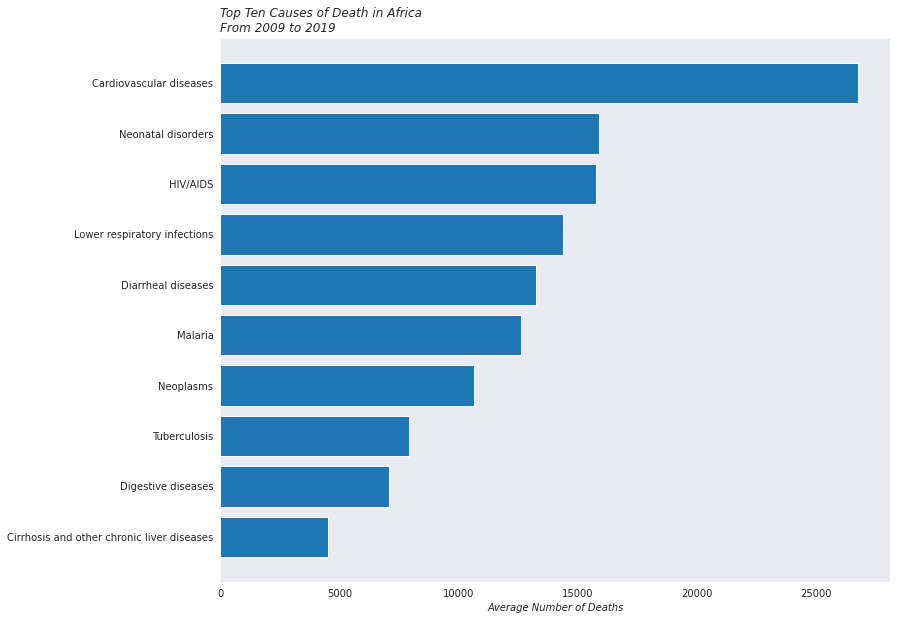

In [79]:
#set figure size 
plt.figure(figsize = (12, 10)) 

#create barplot 
plt.barh(x_num, y_values, tick_label = x_labels); 
plt.gca().invert_yaxis()
plt.grid(False) 

#label axes and title 
plt.xlabel("Average Number of Deaths", style = "oblique") 
plt.title("Top Ten Causes of Death in Africa\nFrom 2009 to 2019", 
         loc = "left", style = "oblique");


Between 2009 and 2019, Africa experienced an average of more than 25,000 deaths due to cardiovascular illnesses. Neonatal conditions and HIV/AIDS come next, both causing a close number of deaths on average.


### 2. African countries with the highest death toll over the past ten years 

In [80]:
%%sql 

-- get countries in Africa with the most deaths from 2009 to 2019

SELECT country,
       code,
       CAST(ROUND(AVG(num_death)) AS int) avg_deaths 
FROM causes 
WHERE country IN (SELECT country 
                  FROM countries_in_africa)
    AND CAST(year AS date) BETWEEN '2009' AND '2019'
GROUP BY country, code
HAVING AVG(num_death) > (SELECT AVG(num_death) AS total_avg_deaths 
                         FROM causes 
                         WHERE country IN (SELECT country 
                                           FROM countries_in_africa)
                             AND CAST(year AS date) BETWEEN '2009' AND '2019')
ORDER BY avg_deaths DESC;


 * sqlite:///Health_Crisis.db
Done.


country,code,avg_deaths
Nigeria,NGA,47262
Democratic Republic of Congo,COD,18192
South Africa,ZAF,17885
Egypt,EGY,17619
Ethiopia,ETH,17473
Tanzania,TZA,11045
Kenya,KEN,9190
Mozambique,MOZ,8151
Uganda,UGA,7769
Morocco,MAR,6651


In [81]:
#obtain bar plot values 
y_values = [47262, 18192, 17885, 17619, 17473, 
           11045, 9190, 8151, 7769, 6651, 6440, 
           6314, 5954, 5910, 5604, 5553, 5485, 
           5392, 5373] 

x_num = np.arange(len(y_values)) 

x_labels = ["Nigeria", "Democratic Republic of Congo", "South Africa", 
           "Egypt", "Ethiopia", "Tanzania", "Kenya", "Mozambique", 
           "Uganda", "Morocco", "Ghana", "Cameroon", "Cote d'Ivoire", 
           "Sudan", "Mali", "Angola", "Burkina Faso", "Algeria", "Niger"]
            


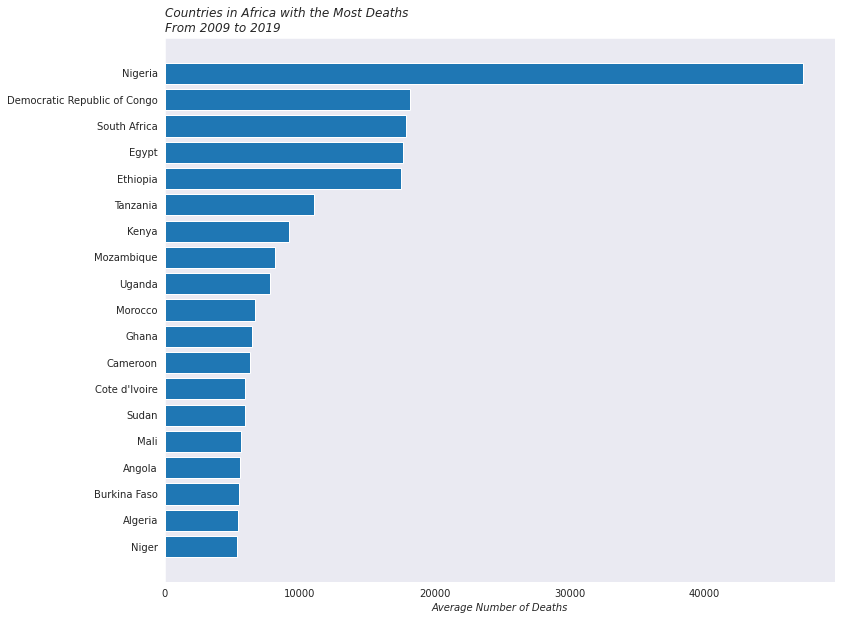

In [82]:
#set figure size 
plt.figure(figsize = (12, 10)) 

#create barplot 
plt.barh(x_num, y_values, tick_label = x_labels); 
plt.gca().invert_yaxis()
plt.grid(False) 

#label axes and title 
plt.xlabel("Average Number of Deaths", style = "oblique") 
plt.title("Countries in Africa with the Most Deaths\nFrom 2009 to 2019", 
         loc = "left", style = "oblique");


Nigeria tops the list of the 19 African countries that recorded the highest death toll between 2009 and 2019 with an average of more than 45,000 deaths.   

### 3. Age group with the highest death rate during the past ten years 

In [83]:
%%sql 

-- get the average number of deaths for each age group in Africa
-- from 2009 to 2019

SELECT age_group, 
       CAST(ROUND(AVG(num_death)) AS int) AS avg_death
             
FROM age_groups 
WHERE country IN (SELECT country 
                  FROM countries_in_africa)
    AND CAST(year AS date) BETWEEN '2009' AND '2019'
GROUP BY age_group
ORDER BY avg_death DESC;


 * sqlite:///Health_Crisis.db
Done.


age_group,avg_death
<5,61156
15-49,35832
70+,35138
50-69,33301
5-14,5499


In [84]:
#obtain bar plot values 
y_values = [61156, 5499, 35832, 
           33301, 35138]

x_num = np.arange(len(y_values)) 

x_labels = ["<5", "5-14", "15-49",
           "50-69", "70+"]
    

In [85]:
#set colors to use on bars                     
colors = ["r", "b", "b", "b", "b"]  
    

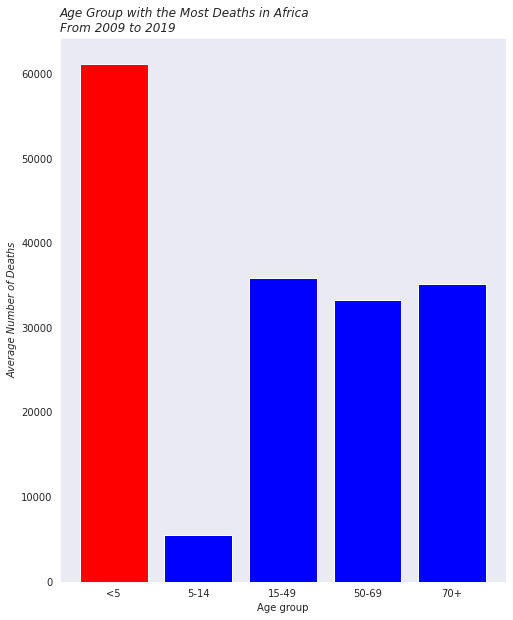

In [86]:
#set figure size 
plt.figure(figsize = (8, 10)) 

#create barplot 
plt.bar(x_num, y_values, tick_label = x_labels, color = colors); 
plt.grid(False) 

#label axes and title 
plt.ylabel("Average Number of Deaths", style = "oblique") 
plt.xlabel("Age group")
plt.title("Age Group with the Most Deaths in Africa\nFrom 2009 to 2019", 
         loc = "left", style = "oblique");


Children under the age of five had more recorded deaths than people of older ages. 

### 4.  Death trend for cardiovascular diseases and neonatal disorders over the past ten years 

In [87]:
%%sql 

SELECT cause,
       SUM(num_death) filter (WHERE year = 2009) AS "2009",
       SUM(num_death) filter (WHERE year = 2010) AS "2010",
       SUM(num_death) filter (WHERE year = 2011) AS "2011",
       SUM(num_death) filter (WHERE year = 2012) AS "2012", 
       SUM(num_death) filter (WHERE year = 2013) AS "2013",
       SUM(num_death) filter (WHERE year = 2014) AS "2014",
       SUM(num_death) filter (WHERE year = 2015) AS "2015",
       SUM(num_death) filter (WHERE year = 2016) AS "2016", 
       SUM(num_death) filter (WHERE year = 2017) AS "2017",
       SUM(num_death) filter (WHERE year = 2018) AS "2018", 
       SUM(num_death) filter (WHERE year = 2019) AS "2019"
FROM causes 
WHERE country IN (SELECT country 
                  FROM countries_in_africa) 
    AND CAST(year AS date) BETWEEN '2009' AND '2019' 
    AND cause IN ('Cardiovascular diseases', 
                  'Neonatal disorders')
GROUP BY cause
ORDER BY cause;


 * sqlite:///Health_Crisis.db
Done.


cause,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Cardiovascular diseases,1295473,1318686,1343136,1377035,1407259,1438445,1485863,1514684,1542059,1573934,1608114
Neonatal disorders,892488,889670,886576,880950,874884,866408,856035,845790,829965,816729,803446


In [88]:
year = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 
        2018, 2019] 

total_death_cad = [1295473, 1318686, 1343136, 1377035, 1407259, 
                   1438445, 1485863, 1514684, 1542059, 1573934, 
                   1608114]

total_death_neo = [892488, 889670, 886576, 880950, 874884, 866408, 
                   856035, 845790, 829965, 816729, 803446]
                   


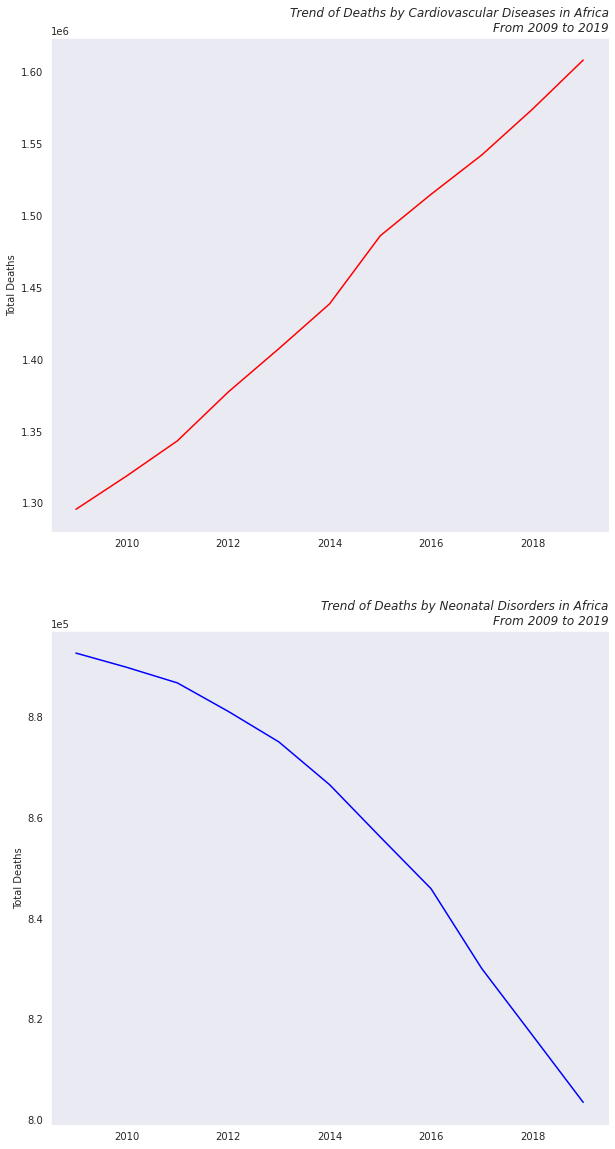

In [89]:
#set figure size 
plt.figure(figsize = (10, 20))

#plot 1 
plt.subplot(2, 1, 1)
plt.plot(year, total_death_cad, color = "red")
plt.grid(False)
plt.ylabel("Total Deaths") 
plt.title("Trend of Deaths by Cardiovascular Diseases in Africa\nFrom 2009 to 2019", 
         loc = "right", style = "oblique") 

#plot 2
plt.subplot(2, 1, 2)
plt.plot(year, total_death_neo, color = "blue")
plt.ticklabel_format(axis = "y", scilimits = [0,0])
plt.grid(False) 
plt.ylabel("Total Deaths") 
plt.title("Trend of Deaths by Neonatal Disorders in Africa\nFrom 2009 to 2019", 
         loc = "right", style = "oblique"); 
    

Africa saw an increase in deaths from cardiovascular diseases between 2009 and 2019, however there was a decrease in deaths from neonatal disorders. 

### 5. Leading cause of death in Nigeria in 2019  

In [90]:
%%sql

-- get the top ten causes of death in Nigeria in 2019

SELECT cause, 
       num_death AS total_death
FROM causes 
WHERE country = 'Nigeria' 
AND CAST(year AS date) = '2019'
GROUP BY cause 
ORDER BY total_death DESC
LIMIT 10;


 * sqlite:///Health_Crisis.db
Done.


cause,total_death
Neonatal disorders,195397
Malaria,191106
Diarrheal diseases,181138
Lower respiratory infections,172978
Cardiovascular diseases,163496
HIV/AIDS,82270
Neoplasms,81558
Digestive diseases,70077
Tuberculosis,45278
Meningitis,44914


In [91]:
#obtain bar plot values 
y_values = [195397, 191106, 181138, 172978, 163496, 
           82270, 81558, 70077, 45278, 44914] 

x_num = np.arange(len(y_values)) 

x_labels = ["Neonatal disorders", "Malaria", "Diarrheal diseases", 
           "Lower respiratory infections", "Cardiovascular diseases", 
           "HIV/AIDS", "Neoplasms", "Digestive diseases", "Tuberculosis", 
           "Meningitis"]


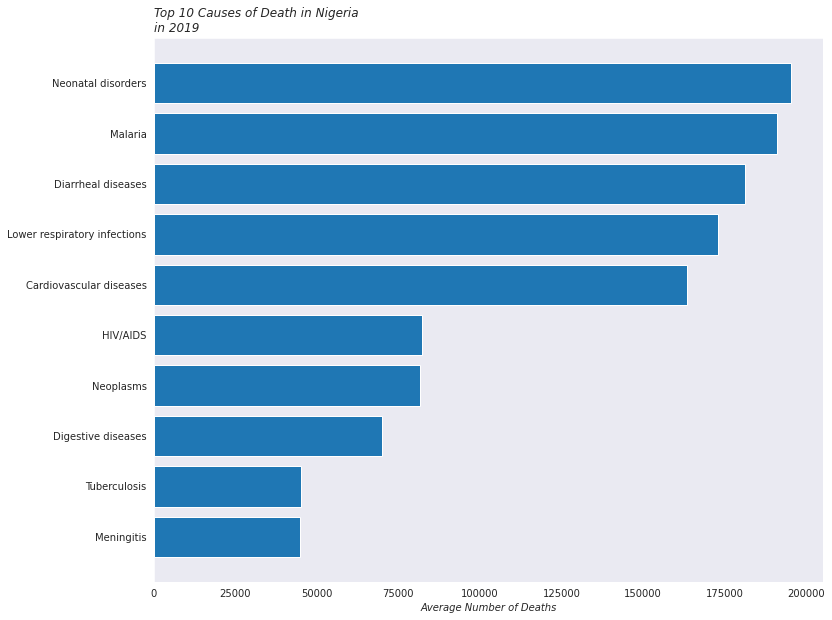

In [92]:
#set figure size 
plt.figure(figsize = (12, 10)) 

#create barplot 
plt.barh(x_num, y_values, tick_label = x_labels); 
plt.gca().invert_yaxis()
plt.grid(False) 

#label axes and title 
plt.xlabel("Average Number of Deaths", style = "oblique") 
plt.title("Top 10 Causes of Death in Nigeria\nin 2019",
          loc = "left", style = "oblique");


Neonatal disorders account for the majority of deaths in Nigeria in 2019. The top five causes of mortality in Nigeria in 2019 also include malaria, diarrheal diseases, lower respiratory infections, cardiovascular disease. 

### 6. Top 5 African countries by population growth over the past ten years  

In [93]:
%%sql 

SELECT country, CAST(ROUND(AVG(population)/1000000) AS int) AS avg_pop_in_millions 
FROM world_population
WHERE country IN (SELECT country 
                  FROM countries_in_africa)
    AND CAST(year AS date) BETWEEN '2009' AND '2019' 
GROUP BY country 
ORDER BY avg_pop_in_millions DESC
LIMIT 5;



 * sqlite:///Health_Crisis.db
Done.


country,avg_pop_in_millions
Nigeria,180
Ethiopia,100
Egypt,96
Democratic Republic of Congo,76
South Africa,55


In [94]:
#obtain bar plot values 
y_values = [180, 100, 96, 76, 55] 

x_num = np.arange(len(y_values)) 

x_labels = ["Nigeria", "Ethiopia", "Egypt", 
           "Democratic Republic of Congo", 
           "South Africa"] 

colors = ["r", "b", "b", "b", "b"]


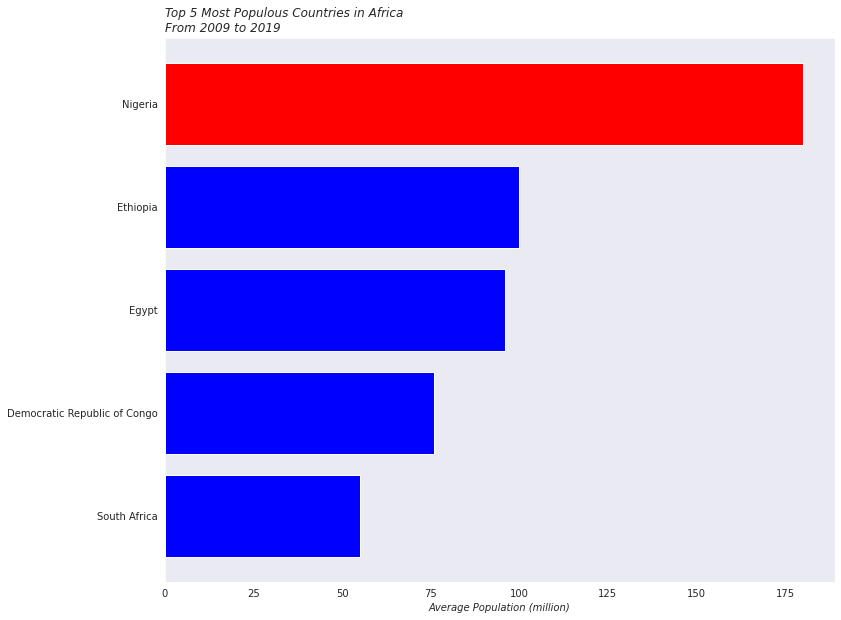

In [95]:
#set figure size 
plt.figure(figsize = (12, 10)) 

#create barplot 
plt.barh(x_num, y_values, tick_label = x_labels, color = colors); 
plt.gca().invert_yaxis()
plt.grid(False) 

#label axes and title 
plt.xlabel("Average Population (million)", style = "oblique") 
plt.title("Top 5 Most Populous Countries in Africa\nFrom 2009 to 2019",
          loc = "left", style = "oblique");


The population of Nigeria, which averaged approximately 180 million people from 2009 to 2019, is the highest in Africa. 

The top 5 most populous countries in Africa also include Ethiopia, Egypt, the Democratic Republic of the Congo, and South Africa. 

<a id='conclusion'></a>
## Conclusion 

- The leading causes of death in Africa are cardiovascular diseases, neonatal disorders, HIV/AIDS, lower respiratory infections, and diarrheal diseases.


- The majority of deaths in Africa occur in children under the age of five.


- 19 of the 54 nations in Africa have a high annual death.  


- The top 20 most populous African nations include the 19 nations with the highest death rates, and Nigeria has the most population.


- Nigeria has the highest annual death rate in Africa. 

<a id='limitations'></a>
## Limitations  

- The data used in this analysis is outdated; the number of deaths in Africa due to different causes and by age group ends in 2019. A more recent dataset might yield different outcomes. 


- Only 32 causes of death are represented in the data, leaving out deaths from other causes. 

<a id='refs'></a>
## References

- [Wikipedia](https://en.m.wikipedia.org/wiki/Africa)<br>
- [United Nations Environment Programme (UNEP)](https://www.unep.org/regions/africa/our-work-africa#:~:text=The%20continent%20has%2040%20percent,internal%20renewable%20fresh%20water%20source.)<br>
- [Statista](https://www.statista.com/statistics/1282721/number-of-deaths-in-africa/)<br>
- [WHO](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1661756/)<br>
- [Hadley Wickham: Tidy Data](https://www.jstatsoft.org/article/view/v059i10)<br>
- [Worldometer](https://www.worldometers.info/geography/how-many-countries-in-africa/#:~:text=There%20are%2054%20countries%20in,the%20United%20Nations%20official%20statistics)<br>
- [WHO](https://www.who.int/data/nutrition/nlis/info/health-expenditure)<br> 